In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/' 

Mounted at /content/gdrive


In [3]:
import cv2
from glob import glob
!pip install wget
import wget
import os, sys
import numpy as np
from google.colab.patches import cv2_imshow

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=28c6ea0a6d60d9be07ae44d403aca5f9b227c173880b36c2c0e90280f3f7105c
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
wget.download('https://image-net.org/data/tiny-imagenet-200.zip', '/content/gdrive/MyDrive/cs259 project/imagenet')

'/content/gdrive/MyDrive/cs259 project/imagenet/tiny-imagenet-200.zip'

In [ ]:
!unzip '/content/gdrive/MyDrive/cs259 project/imagenet/tiny-imagenet-200.zip' -d '/content/gdrive/MyDrive/cs259 project/imagenet/tiny-imagenet-200' 

In [ ]:
wget.download('https://imagecompression.info/test_images/rgb8bit.zip' , '/content/gdrive/MyDrive/cs259 project/jpeg_data')
wget.download('https://imagecompression.info/test_images/rgb16bit.zip' , '/content/gdrive/MyDrive/cs259 project/jpeg_data')

'/content/gdrive/MyDrive/cs259 project/jpeg_data/rgb16bit.zip'

The prior cells download and import necessary img and modules. Now we'll load and write the images from .ppm to .jpeg, with "quality" setting of 90.

In [5]:
cwd = os.getcwd()
input_dir = os.path.join(cwd, "/content/gdrive/MyDrive/cs259 project/unused/jpeg_data/train_data/8bit/*.ppm")    
ppms = glob(input_dir)   

In [ ]:
def load_and_write(ppms, dest_path):
  "ppms is list of pathnames to ppms to be converted to jpg"
  counter = 1
  
  for ppm in ppms: 
      cv2.imwrite(dest_path + str(counter)+".jpg", cv2.imread(ppm), [int(cv2.IMWRITE_JPEG_QUALITY), 90])
      counter += 1 

In [ ]:
dest_path = "/content/gdrive/MyDrive/cs259 project/jpeg_data/train_data/cv2_results/"
%timeit -n3 load_and_write(ppms, dest_path)
%time load_and_write(ppms, dest_path)


3 loops, best of 5: 4.25 s per loop
CPU times: user 3.18 s, sys: 388 ms, total: 3.57 s
Wall time: 4.26 s


## Better way to benchmark OpenCV:
- Image load done separately
- function encode_decode()
- takes img from imread, then encodes to 95, then decodes and outputs decoded


In [6]:
num_img = len(ppms)
# img_buf = np.empty(num_img)  # buffer to hold all image data (ppm)
img_buf = []

# read ppm images to img_buf
for count, ppm in enumerate(ppms):
  img_buf.append(cv2.imread(ppm, 1))

#print(len(img_buf))

# just ENCODE, no decoding
def encode(images, quality=95):
  encoded_images = []
  for count, img in enumerate(images):
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality]
    success, enc_img = cv2.imencode('.jpg', img, encode_param)
    encoded_images.append(enc_img)
    if not success:
      print('Error encoding image.')
      sys.exit(2)
  return encoded_images

#encodes then decodes
def encode_decode(images, quality=95):
  decoded_images = []
  for count, img in enumerate(images):
    # encode to jpeg
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality]
    success, enc_img = cv2.imencode('.jpg', img, encode_param)
    if not success:
      print('Error encoding image.')
      sys.exit(2)
    # decode from jpeg
    dec_img = cv2.imdecode(enc_img, 1)
    decoded_images.append(dec_img)
  return decoded_images

# for count, image in enumerate(img_buf):
#   print("Source PPM\n")
#   cv2_imshow(image)
#   print("Decoded JPEG\n")
#   cv2_imshow(jpgs[count])


In [ ]:
# %timeit -n2 enc_jpg = encode(img_buf)
# %timeit -n2 jpgs = encode_decode(img_buf)

jpgs = encode_decode(img_buf)

[]

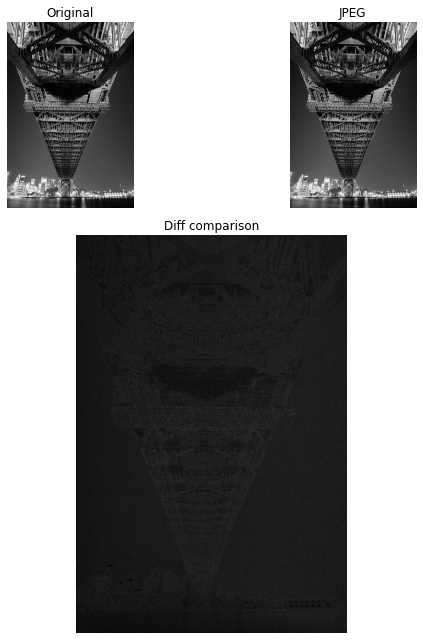

In [ ]:
# this one was 20 quality

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from skimage import data, transform, exposure
from skimage.util import compare_images


img1_ppm = cv2.cvtColor(img_buf[0], int(cv2.COLOR_BGR2GRAY))
img1_jpg = cv2.cvtColor(jpgs[0], int(cv2.COLOR_BGR2GRAY))
# img1_ppm = (img_buf[0])
# img1_jpg = (jpgs[0])


diff = compare_images(img1_ppm, img1_jpg, method='diff')
# blend_rotated = compare_images(img1, img2, method='blend')


fig = plt.figure(figsize=(8, 9))

gs = GridSpec(3, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1:, :])

ax0.imshow(img1_ppm, cmap='gray')
ax0.set_title('Original')
ax1.imshow(img1_jpg, cmap='gray')
ax1.set_title('JPEG')

ax2.imshow(diff, cmap='gray')
ax2.set_title('Diff comparison')
for a in (ax0, ax1, ax2):
    a.axis('off')
plt.tight_layout()
plt.plot()

In [ ]:
## testing 95 quality

# %timeit -n2 enc_jpg = encode(img_buf)
# %timeit -n2 jpgs = encode_decode(img_buf)

jpgs = encode_decode(img_buf)

[]

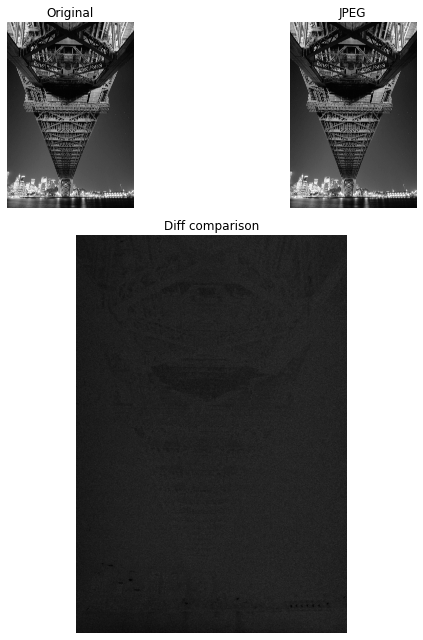

In [ ]:

img1_ppm = cv2.cvtColor(img_buf[0], int(cv2.COLOR_BGR2GRAY))
img1_jpg = cv2.cvtColor(jpgs[0], int(cv2.COLOR_BGR2GRAY))
# img1_ppm = (img_buf[0])
# img1_jpg = (jpgs[0])


diff = compare_images(img1_ppm, img1_jpg, method='diff')
# blend_rotated = compare_images(img1, img2, method='blend')


fig = plt.figure(figsize=(8, 9))

gs = GridSpec(3, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1:, :])

ax0.imshow(img1_ppm, cmap='gray')
ax0.set_title('Original')
ax1.imshow(img1_jpg, cmap='gray')
ax1.set_title('JPEG')

ax2.imshow(diff, cmap='gray')
ax2.set_title('Diff comparison')
for a in (ax0, ax1, ax2):
    a.axis('off')
plt.tight_layout()
plt.plot()

#Evaluations: quantifying the differences/quality. Using RMSE

In [ ]:
from skimage.metrics import normalized_root_mse, mean_squared_error

# quality 20
jpgs = encode_decode(img_buf, 20)
img1_ppm = img_buf[0]
img1_jpg = jpgs[0]

rmse = np.sqrt(mean_squared_error(img1_ppm, img1_jpg))
print(rmse)

#quality 95
jpgs = encode_decode(img_buf, 95)
img1_ppm = img_buf[0]
img1_jpg = jpgs[0]

rmse = np.sqrt(mean_squared_error(img1_ppm, img1_jpg))
print(rmse)



8.439851479277126
4.555184900168402


In [39]:
jpgs = encode_decode(img_buf, 95)
print("Evaluating RMSE for OpenCV JPEG Compression (Quality 95)")
for count, img in enumerate(img_buf):
  print("Image " + str(count+1) + " RMSE: " + str(np.sqrt(mean_squared_error(img, jpgs[count]))))

Evaluating RMSE for OpenCV JPEG Compression (Quality 95)


In [ ]:
jpgs = encode_decode(img_buf, 65)
print("Evaluating RMSE for OpenCV JPEG Compression (Quality 65)")
for count, img in enumerate(img_buf):
  print("Image " + str(count+1) + " RMSE: " + str(np.sqrt(mean_squared_error(img, jpgs[count]))))

Evaluating RMSE for OpenCV JPEG Compression (Quality 65)
Image 1 RMSE: 6.579187679086622
Image 2 RMSE: 4.714099582494011
Image 3 RMSE: 2.8415490990109986
Image 4 RMSE: 8.548240030971064
Image 5 RMSE: 2.5474225236352668
Image 6 RMSE: 2.5450295156929497
Image 7 RMSE: 5.821499410430126
Image 8 RMSE: 7.240702053978317
Image 9 RMSE: 3.076905183897576
Image 10 RMSE: 6.770245084657024
Image 11 RMSE: 1.950647789446987


### OpenCV evaluation on test images

In [7]:
cwd = os.getcwd()
input_dir = os.path.join(cwd, "/content/gdrive/MyDrive/cs259 project/unused/jpeg_data/test_data/png_data/*.png")    
ppms = glob(input_dir)  

In [8]:
img_buf = []

# read ppm images to img_buf
for count, ppm in enumerate(ppms):
  img_buf.append(cv2.imread(ppm, 1))

In [10]:
from skimage.metrics import normalized_root_mse, mean_squared_error

jpgs = encode_decode(img_buf, 95)
print("Evaluating RMSE for OpenCV JPEG Compression (Quality 95) on Test Images")
total_loss = 0
for count, img in enumerate(img_buf):
  im_loss = np.sqrt(mean_squared_error(img, jpgs[count]))
  total_loss += im_loss
  print("Image " + str(count+1) + " RMSE: " + str(im_loss))
print("Average loss over all test images: " + str(total_loss/7))

Evaluating RMSE for OpenCV JPEG Compression (Quality 95) on Test Images
Image 1 RMSE: 2.9809320564869464
Image 2 RMSE: 4.861015466694294
Image 3 RMSE: 4.861517977853798
Image 4 RMSE: 2.046285659291869
Image 5 RMSE: 2.0415939525708673
Image 6 RMSE: 2.9743269505276766
Image 7 RMSE: 4.097019433356972
Average loss over all test images: 3.4089559281117743


In [50]:
## time computation to encode decode test images with OpenCV
## on GPU
%timeit encode_decode(img_buf, 95)

1 loop, best of 5: 4.34 s per loop


In [11]:
# with hardware acceleration (GPU) off
%timeit encode_decode(img_buf, 95)

1 loop, best of 5: 5.22 s per loop


### NN Model evaluation

In [28]:
# get the CNN images
cnn_images = cv2.imread('/content/gdrive/MyDrive/cs259 project/results2/reconstruction_200.png')
#split into original and reconstructed
original = cnn_images[0:int(cnn_images.shape[0]/2)]
reconstructed = cnn_images[int(cnn_images.shape[0]/2):int(cnn_images.shape[0])]



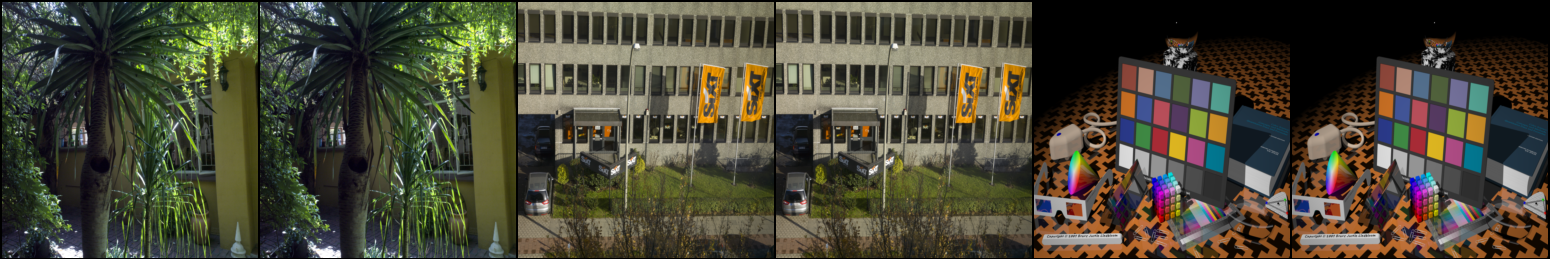

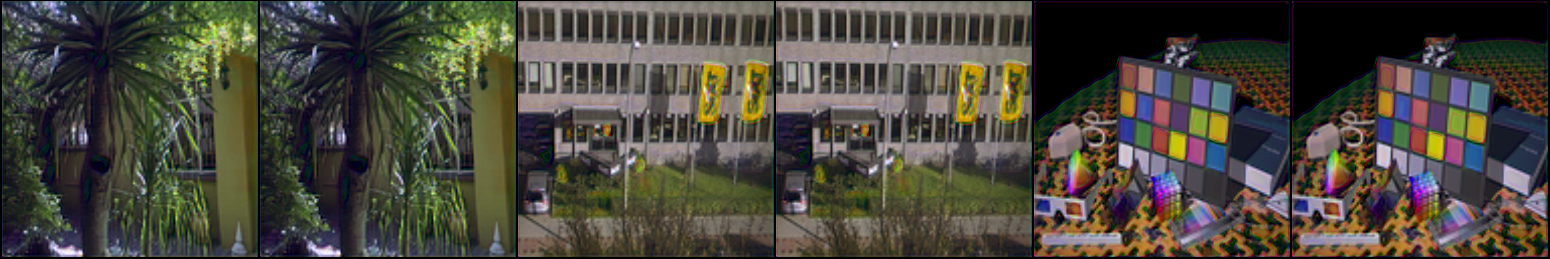

In [29]:
from google.colab.patches import cv2_imshow
cv2_imshow(original)
cv2_imshow(reconstructed)

In [32]:
from skimage.metrics import normalized_root_mse, mean_squared_error

print("CNN Test Images Average RMSE: " + str(np.sqrt(mean_squared_error(original, reconstructed)/6)))

CNN Test Images Average RMSE: 8.437247449126383


#END of evaluation

In [ ]:
# convert ppms to pngs

from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/' 

import cv2
from glob import glob
!pip install wget
import wget
import os, sys
import numpy as np
from google.colab.patches import cv2_imshow





Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Here I modified the load_and_write to convert ppm files to png files


In [ ]:

def load_and_write(ppms, input_path, dest_path):
  "ppms is list of pathnames to ppms to be converted to png"
  cwd = os.getcwd()
  input_dir = os.path.join(cwd, input_path)    
  ppms = glob(input_dir)   
  counter = 1
  for ppm in ppms: 
      cv2.imwrite(dest_path + str(counter)+".png", cv2.imread(ppm))
      counter += 1 


In [ ]:

input_dir = "/content/gdrive/MyDrive/cs259 project/jpeg_data/train_data/{}/*.ppm".format("8bit")
dest_dir = "/content/gdrive/MyDrive/cs259 project/jpeg_data/train_data/png_data/8_bit/"
load_and_write(ppms, input_dir, dest_dir )


In [ ]:

input_dir = "/content/gdrive/MyDrive/cs259 project/jpeg_data/train_data/{}/*.ppm".format("16bit")
dest_dir = "/content/gdrive/MyDrive/cs259 project/jpeg_data/train_data/png_data/16_bit/"
load_and_write(ppms, input_dir, dest_dir )

In [ ]:
input_dir = "/content/gdrive/MyDrive/cs259 project/jpeg_data/test_data/*.ppm"
dest_dir = "/content/gdrive/MyDrive/cs259 project/jpeg_data/test_data/png_data/"
load_and_write(ppms, input_dir, dest_dir )

In [ ]:
img_buf = []

# read png images to img_buf
for count, ppm in enumerate(ppms):
  img_buf.append(cv2.imread(ppm, 1))

# Evaluating RMSE for CNN compressed/decompressed images

In [1]:
import torch

import os
import datetime
import torch
import torchvision
from torch import nn , optim
from torchvision import datasets, transforms
from torch.autograd import Variable

!pip install Pillow==8.2.0
!pip install PIL
!pip install image
!pip install lmdb
import cv2


%reload_ext autoreload
%autoreload

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [2]:
%reload_ext autoreload
%autoreload

In [4]:
from google.colab import drive
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
CHANNELS = 3
HEIGHT = 256
WIDTH = 256
EPOCHS = 200
LOG_INTERVAL = 500

In [6]:
class Interpolate(nn.Module):
    def __init__(self, size, mode):
        super(Interpolate, self).__init__()
        self.interp = nn.functional.interpolate
        self.size = size
        self.mode = mode
        
    def forward(self, x):
        x = self.interp(x, size=self.size, mode=self.mode, align_corners=False)
        return x

In [7]:
class End_to_end(nn.Module):
  def __init__(self):
    super(End_to_end, self).__init__()
    
    # Encoder
    # TODO : try with padding = 0
    
    self.conv1 = nn.Conv2d(CHANNELS, 64, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=0)
    self.bn1 = nn.BatchNorm2d(64, affine=False)
    self.conv3 = nn.Conv2d(64, CHANNELS, kernel_size=3, stride=1, padding=1)
    
    # Decoder
    #TODO : try ConvTranspose2d
    self.interpolate = Interpolate(size=HEIGHT, mode='bilinear')
    self.deconv1 = nn.Conv2d(CHANNELS, 64, 3, stride=1, padding=1)
    self.deconv2 = nn.Conv2d(64, 64, 3, stride=1, padding=1)
    self.bn2 = nn.BatchNorm2d(64, affine=False)
    
    self.deconv_n = nn.Conv2d(64, 64, 3, stride=1, padding=1)
    self.bn_n = nn.BatchNorm2d(64, affine=False)

    
    self.deconv3 = nn.ConvTranspose2d(64, CHANNELS, 3, stride=1, padding=1)
    
    self.relu = nn.ReLU()
  
  def encode(self, x):
    out = self.relu(self.conv1(x))
    out = self.relu(self.conv2(out))
    out = self.bn1(out)
    return self.conv3(out)
    
  
  def reparameterize(self, mu, logvar):
    pass
  
  def decode(self, z):
    upscaled_image = self.interpolate(z)
    out = self.relu(self.deconv1(upscaled_image))
    out = self.relu(self.deconv2(out))
    out = self.bn2(out)
    for _ in range(10):
      out = self.relu(self.deconv_n(out))
      out = self.bn_n(out)
    out = self.deconv3(out)
    final = upscaled_image + out
    return final,out,upscaled_image

    
  def forward(self, x):
    com_img = self.encode(x)
    final,out,upscaled_image = self.decode(com_img)
    return final, out, upscaled_image, com_img, x

  


### Optimizer and loss function 

In [8]:
CUDA = torch.cuda.is_available()
if CUDA:
  model = End_to_end().cuda()
else :
  model = End_to_end()
  
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [9]:
def loss_function(final_img, orig_img):
  
  return nn.MSELoss(size_average=False)(orig_img, final_img)
  

In [10]:

img_transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor()#,
    
#     transforms.Normalize((0.5, 0.5, 0.5), (0.24703223,  0.24348513 , 0.26158784))
])

data_path = '/content/gdrive/MyDrive/cs259 project/unused/jpeg_data/'

testset = torchvision.datasets.ImageFolder( root=data_path+'test_data/', transform=img_transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=8,shuffle=False, num_workers=2)

In [12]:
%autoreload

In [18]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image


model.load_state_dict(torch.load('/content/gdrive/MyDrive/cs259 project/model.pth'))

model.eval()

test_loss = 0
for i, (data, _) in enumerate(test_loader):
  data = Variable(data, volatile=True)
  final, residual_img, upscaled_image, com_img, orig_im = model(data.cuda())

  %matplotlib inline
  final.cpu()
  imshow(np.asarray(final))

  test_loss += loss_function(final, orig_im).data
  
test_loss /= len(test_loader)
print('====> Test set loss: {:.4f}'.format(test_loss))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  if sys.path[0] == '':


TypeError: ignored